# Introduction to Keras

---
## Binary Classification

Start with the model from the textbook.

In [1]:
from keras.datasets import imdb

# Loads the data, only keeps the 10,000 most frequently occuring words.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

/Users/jtbergman/miniconda2/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Let's write a function to convert integer sequences into reviews.

In [5]:
def sequence_to_text(sequence):
    """Converts an integer sequence into the actual review text."""
    word_index = imdb.get_word_index()
    reverse_index = {value: key for (key, value) in word_index.items()}
    return ' '.join([reverse_index.get(i - 3, '?') for i in sequence])

print("Review")
print("~~~~~~")
print(sequence_to_text(train_data[0]), end="\n\n")

print("Sentiment")
print("~~~~~~~~~")
print(train_labels[0])

Review
~~~~~~
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done

We have to prepare our data to be fed into a neural network.

In [6]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorize our input data 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize our label data as well 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now, let's train a first model

In [7]:
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

We can use keras to see what our model looks like

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Now let's pick our optimizer, loss, and metrics. 

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Let's create a training set and validation set.

In [17]:
# Separate input data
x_val = x_train[:10000]
x_train_partial = x_train[10000:]

# Separate labels 
y_val = y_train[:10000]
y_train_partial = y_train[10000:]

Finally, we can train our model.

In [18]:
history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.4494 - acc: 0.8174 - val_loss: 0.3169 - val_acc: 0.8835
Epoch 2/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.2390 - acc: 0.9175 - val_loss: 0.2759 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1709 - acc: 0.9397 - val_loss: 0.2792 - val_acc: 0.8901
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1306 - acc: 0.9549 - val_loss: 0.3569 - val_acc: 0.8650
Epoch 5/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1008 - acc: 0.9668 - val_loss: 0.3342 - val_acc: 0.8794
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0762 - acc: 0.9763 - val_loss: 0.3707 - val_acc: 0.8790
Epoch 7/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0593 - acc: 0.9815 - val_loss: 0.4105 - 

Let's take a look at the training and validation loss.

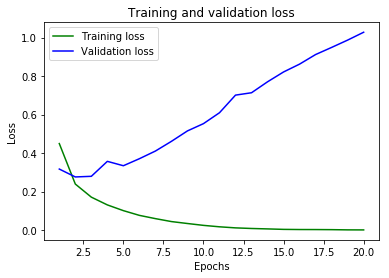

In [20]:
import matplotlib.pyplot as plt 

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

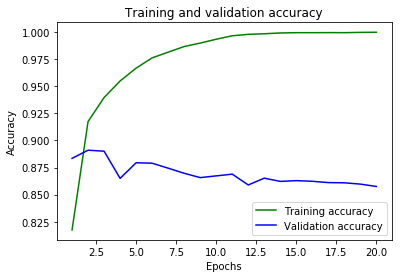

In [21]:
import matplotlib.pyplot as plt 

training_acc = history.history['acc']
validation_acc = history.history['val_acc']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_acc, 'g', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now, let's retrain a model using all of the training data. 

In [23]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=256)

results = model.evaluate(x_test, y_test)
print("Loss: ", results[0])
print("Accuracy: ", results[1])

Epoch 1/3
25000/25000 [==============================] - 3s 116us/step - loss: 0.3915 - acc: 0.8493
Epoch 2/3
25000/25000 [==============================] - 2s 98us/step - loss: 0.2244 - acc: 0.9175
Epoch 3/3
25000/25000 [==============================] - 2s 70us/step
Loss:  0.2988529191303253
Accuracy:  0.88208
